<h2>Stock Data extraction</h2>

In [10]:
!C:\Users\dmitr\AppData\Local\Programs\Python\Python310\python.exe -m pip install yfinance

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached yfinance-0.2.61-py2.py3-none-any.whl (117 kB)
Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl (1.4 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139100 sha256=d35e0be7cb4ef3ad26adb515236f432f7b1e95d7ba76fc8dc6490ed12c28cc91
  Stored in directory: c:\users\dmitr\appdata\local\pip\cache\wheels\8d\c2\af\d


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: C:\Users\dmitr\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [35]:
!pip install lxml html5lib


In [47]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import re

<h3>1. Tesla Stock Data</h3>

In [43]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

tesla_data.reset_index(inplace=True)
display(tesla_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h3>2. Tesla Revenue Data</h3>

In [50]:
tesla = yf.Ticker("TSLA")

qfin = tesla.quarterly_financials

rev_label = [idx for idx in qfin.index if "Revenue" in idx][0]
rev_series = qfin.loc[rev_label]

tesla_revenue = rev_series.reset_index()
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"]).dt.strftime("%Y-%m-%d")

tesla_revenue = tesla_revenue.sort_values("Date")
display(tesla_revenue.tail())

,Date,Revenue
4,2024-03-31,17605000000.0
3,2024-06-30,20922000000.0
2,2024-09-30,20185000000.0
1,2024-12-31,21528000000.0
0,2025-03-31,16182000000.0


<h3>3. GameStop Stock Data</h3>

In [36]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)
display(gme_data.head())

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h3>4. GameStop Revenue Data</h3>

In [51]:
gme = yf.Ticker("GME")

qfin_gme = gme.quarterly_financials

rev_label_gme = [idx for idx in qfin_gme.index if "Revenue" in idx][0]
rev_series_gme = qfin_gme.loc[rev_label_gme]

gme_revenue = rev_series_gme.reset_index()
gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"]).dt.strftime("%Y-%m-%d")

gme_revenue = gme_revenue.sort_values("Date")
display(gme_revenue.tail())

,Date,Revenue
4,2024-01-31,1374400000.0
3,2024-04-30,637300000.0
2,2024-07-31,549500000.0
1,2024-10-31,603100000.0
0,2025-01-31,919200000.0


<h3>5. Tesla Stock Graph</h3>

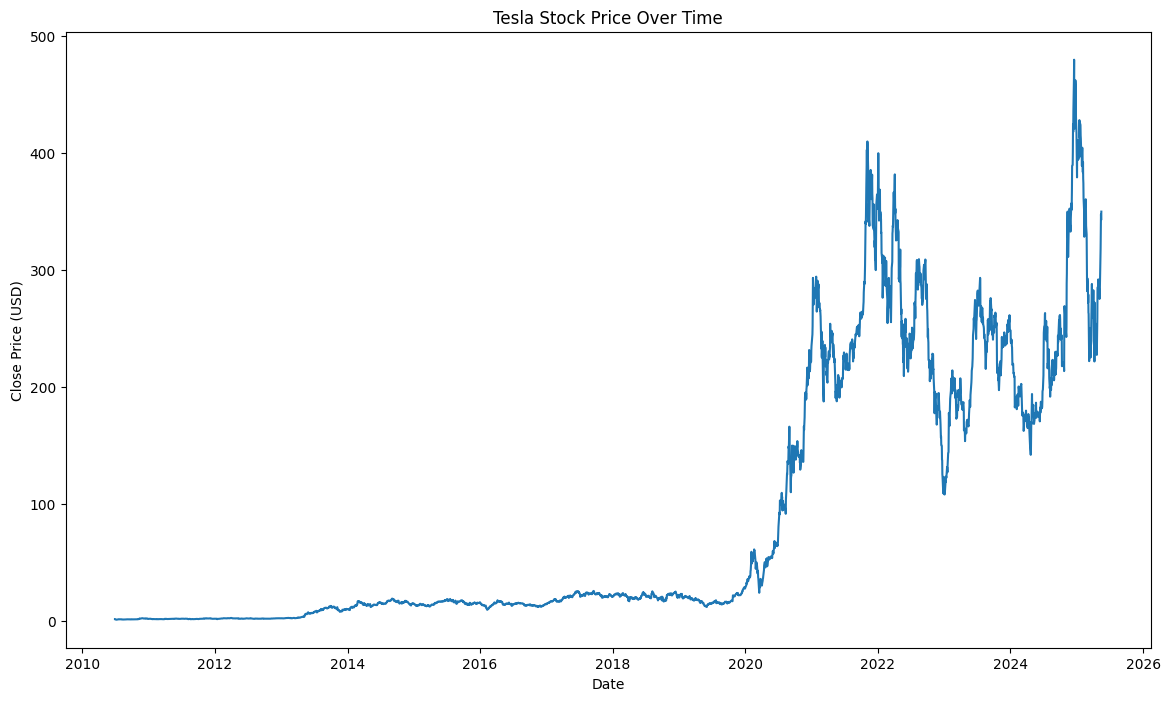

In [52]:
def make_graph(data, title):
    plt.figure(figsize=(14,8))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price (USD)")
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")

<h3>6. GameStop Stock Graph</h3>

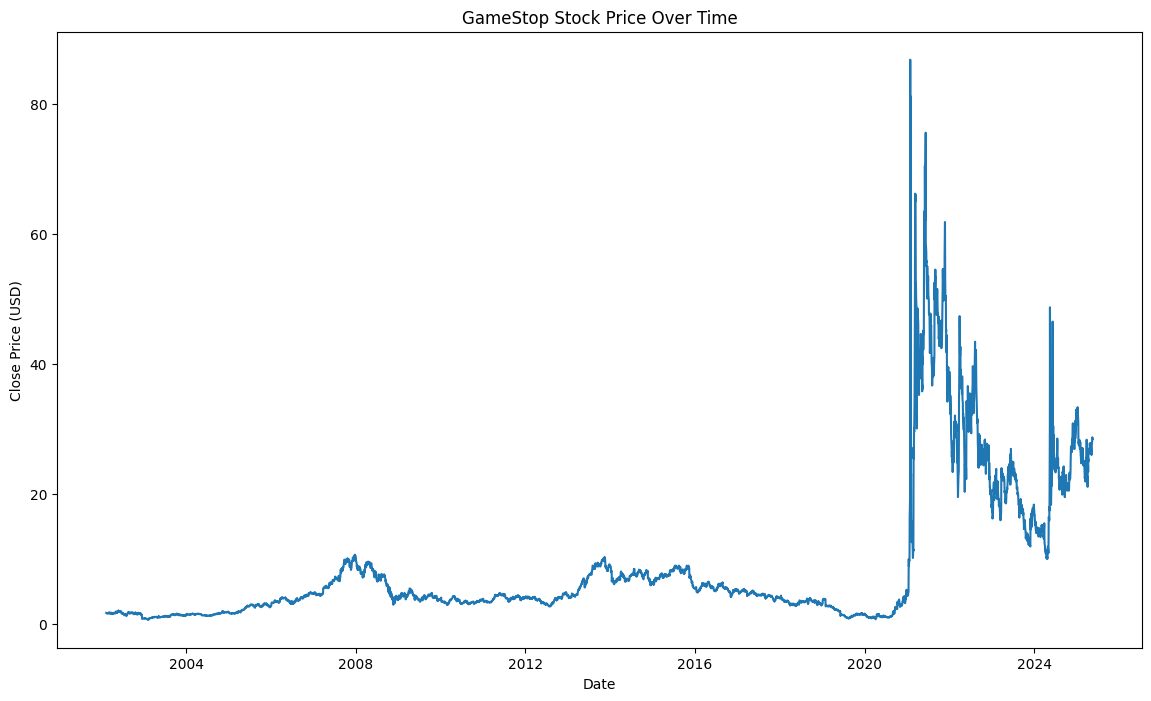

In [39]:
make_graph(gme_data, "GameStop Stock Price Over Time")